# Pymaceuticals Inc.
---

### Analysis

The purpose of this study was to compare the peformance of Pymaceuticals drug, Capomulin, in relation to other cancer drug regimes. For this experiment, there were ten unique drug regimes tested. A sample of 249 mice were grouped  and each group recieved a different drug regime over a 45 day period. The effectiveness of the drug was established by measuring the volume of the tumour(mm3) at the beginninng of the experiment (Timepoint, 0) as a baseline and then over a series of timepoints in this period.
  
This report provides some statistical analysis of the data captured during this experiment, it should be noted that:
  
  - Any mouse that had a that had duplicate time points measured so that there was no counting of this in the experiment.
  - Females and Males were relatively even (49.4, 50.6 respectively), as per Pie Chart below, thus removing these as a variable.
  - The number of mice in each group were fairly similar, ranging from 178 to 230 per group (refer to Bar Chart below).

Overall the results show:

- The mean tumor volume varied from each drug regimen at a range of 40m3 to 54mm3. Ramicane had the lowest average tumour volume (40.216mm3), and standared deveiation of 4.4, Ketapril had the highest average volume of 55.23mm3, and a standard deviaton of 8.27.
- Capomulin had an average tumor of 40.65mm3 and a standard deviation of 4.99, thus having close results to Ramicane. 
- Capomulin and Ramicane had the least spread of results, certainly when compared to Ramicane and Infubinal, that had tumor volumes spread, thus providing less effectivenss of each of these regimes due to the scattered outcomes (changes in tumor volumes).
- There was one drug regime with an outlier in the dataset, that was Infubinol with a volume of 36.2mm3 (the mean for this drug regime was 52.88mm3).
- Ramincane and Infubinal (noting the outlier in Infoubinol) had greater variance in tumor volumes than both Capomul and Ramicane, this is noted in the Box and Whisker chart below.
- The line chart demonstrates a decrease in the volume of tumours under the Capomulin treatment, with a sharp decrease from within the first 10 days of treatment and a continuous decline up to the 45 day mark.
- Investigating the impact of mouse weight of drug regimes, the scatter plot and linear regression chart below reflects a strong correlation between these two variables, that is, that the greater the weight of the mouse, the larger the volume of the tumor.

Limitations
It should be noted that there are limitations to the data analysis undertaken, thus not providing a full exploration of the impact of other variables and the interaction of such variables on their effectivenes of drug regimes. In future it could be worth investigating further age, weight, metastatic sites, number of mice in each group and sex on the effectiveness of drugs reducing cancer tumors. Measuring such independant variables would require redesigning the experiment to place controls on the sample groups. 

Summary
When considering the effectiveness of Capumolin against the other nine drug regimes, it was more effective in reducing tumors than all other regimes, except for Ramicane, which was the most effectivness of these regimes. From the Standard Error of the Mean (SEM) of these two drug regimes, they each have a 0.32 SEM, thus, would have small variance from their peformance outside of the sample (in the true population) and therefore further testing of Capumolin should be considered. 

 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the two DataFrames on the 'Mouse ID' column
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print(merged_data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [34]:
# Find the number of unique mice IDs
unique_mice_ids = merged_data['Mouse ID'].nunique()
print("Number of unique mice IDs: ", unique_mice_ids)

Number of unique mice IDs:  249


In [35]:
# Check for mouse IDs with duplicate time points
duplicate_mouse_ids = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

if len(duplicate_mouse_ids) > 0:
    print("Mouse ID(s) with duplicate time points: ", duplicate_mouse_ids)
else:
    print("No mouse ID with duplicate time points.")

Mouse ID(s) with duplicate time points:  ['g989']


In [36]:
# Create a clean DataFrame by removing all data associated with the duplicate mouse ID 'g989'
cleaned_data = merged_data[merged_data['Mouse ID'] != 'g989']

In [37]:
# Display the updated number of unique mice IDs in the cleaned DataFrame
updated_unique_mice_ids = cleaned_data['Mouse ID'].nunique()
print("Updated number of unique mice IDs after removing data associated with the duplicate mouse ID 'g989': ", updated_unique_mice_ids)

Updated number of unique mice IDs after removing data associated with the duplicate mouse ID 'g989':  248


In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

if len(duplicate_mice_ids) > 0:
    print("Mouse ID(s) with duplicate time points and Mouse ID:")
    print(duplicate_mice_ids)
else:
    print("No mouse ID with duplicate time points and Mouse ID.")

Mouse ID(s) with duplicate time points and Mouse ID:
['g989']


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
print(cleaned_data)

# Display the updated number of unique mice IDs in the cleaned DataFrame
updated_unique_mice_ids = cleaned_data['Mouse ID'].nunique()
print("Updated number of unique mice IDs after dropping duplicates: ", updated_unique_mice_ids)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by 'Drug Regimen' and calculate the required statistics
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary DataFrame
print("Summary Statistics of Tumor Volume for Each Regimen:")
print(summary_stats)


Summary Statistics of Tumor Volume for Each Regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

In [41]:
import pandas as pd

# Group the data by "Drug Regimen" and "Mouse ID" to get the count of unique mice IDs in each drug regimen
grouped_data = merged_data.groupby(["Drug Regimen"])["Mouse ID"].count()

# Reset the index to make "Drug Regimen" a regular column
grouped_data = grouped_data.reset_index("Drug Regimen")

# Set "Drug Regimen" as the index of the grouped_data DataFrame
grouped_data.set_index("Drug Regimen", inplace=True)
grouped_data 

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


<function matplotlib.pyplot.show(close=None, block=None)>

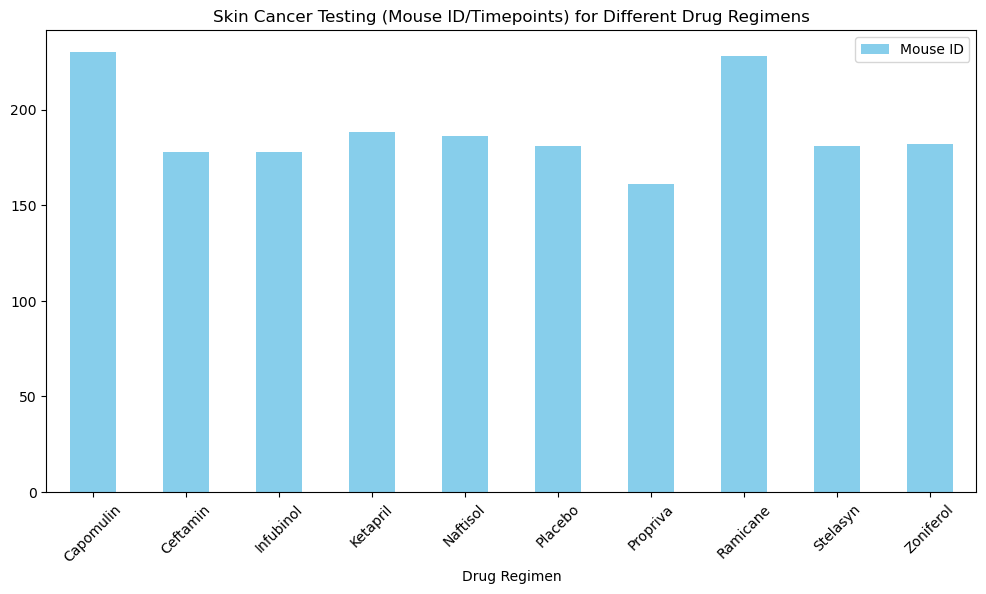

In [42]:
#Use Data frame.plot() to create a bar chart of the data
grouped_data.plot(kind="bar",figsize=(12, 6),color='skyblue', rot=45)

#Set Title
plt.title("Skin Cancer Testing (Mouse ID/Timepoints) for Different Drug Regimens")
plt.show


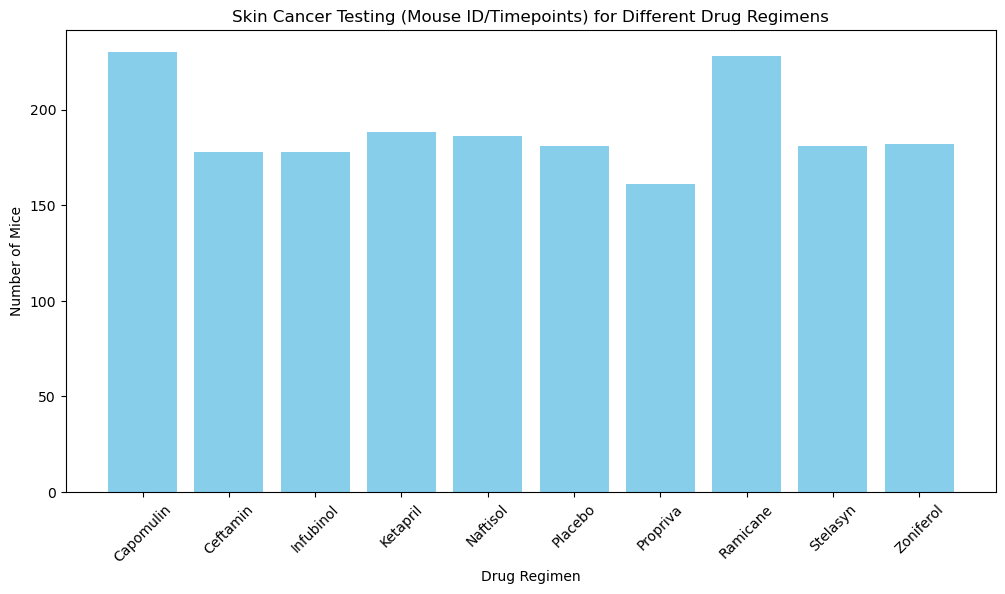

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints)
drug_regimen_counts = merged_data.groupby('Drug Regimen').size()

# Create a bar plot using Pyplot
plt.figure(figsize=(12, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')
plt.title('Skin Cancer Testing (Mouse ID/Timepoints) for Different Drug Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Calculate the total count of males and females
total_males = (merged_data['Sex'] == 'Male').sum()
total_females = (merged_data['Sex'] == 'Female').sum()

print("Total number of males:", total_males)
print("Total number of females:", total_females)

# Create a DataFrame from the total count of males and females
data = {'Gender': ['Male', 'Female'],
        'Total Count': [total_males, total_females]}

gender_counts_df = pd.DataFrame(data)


Total number of males: 958
Total number of females: 935


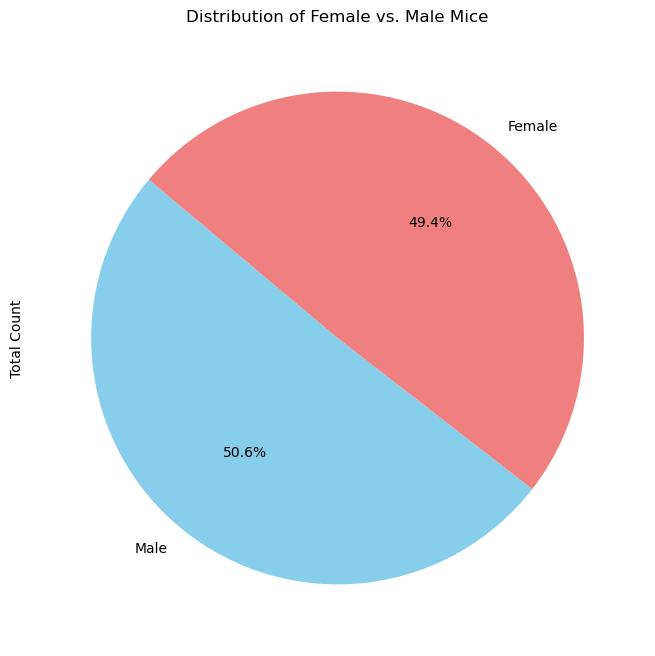

In [45]:
#Use Data frame.plot() to create a bar chart of the data
gender_counts_df.plot(kind='pie', y = 'Total Count', labels=gender_counts_df['Gender'], autopct='%1.1f%%', legend=False, title='Distribution of Female vs. Male Mice', colors=['skyblue', 'lightcoral'], startangle=140, figsize=(8, 8) )

# Show the pie chart
plt.show()

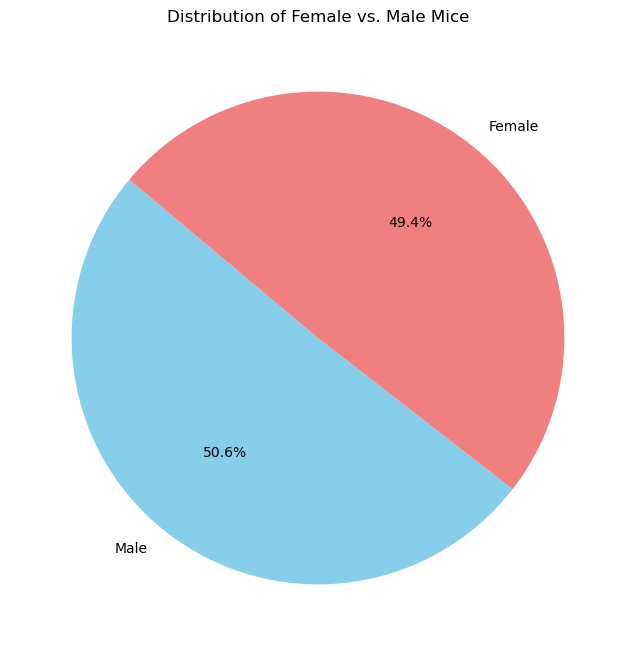

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Group by 'Sex' and count the number of mice for each sex
sex_distribution = merged_data['Sex'].value_counts()

# Create a pie plot using Pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Group by 'Mouse ID' and get the maximum timepoint for each mouse
max_timepoint = merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the max_timepoint DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, merged_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the data for the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_selected = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(selected_regimens)]


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume_selected.loc[final_tumor_volume_selected['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for potential outliers
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


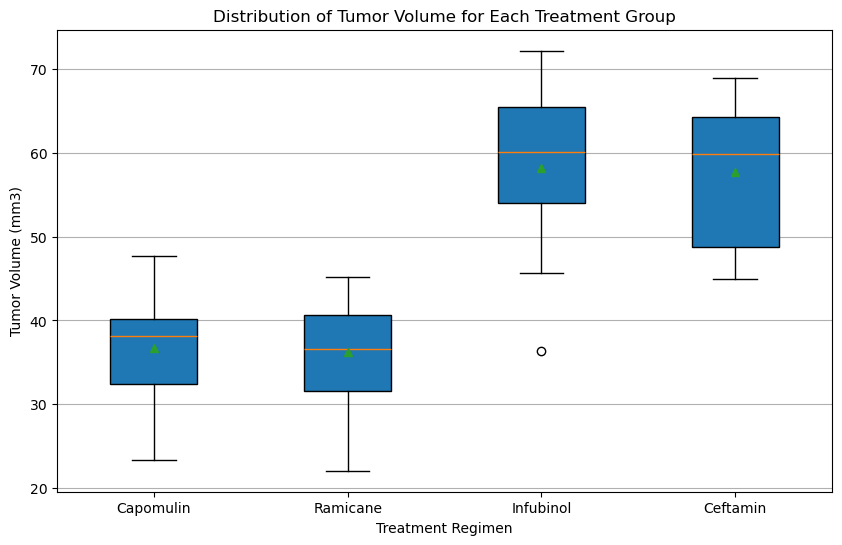

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a box plot to show the distribution of tumor volume for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments_list, patch_artist=True, showmeans=True)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')
plt.show()


## Line and Scatter Plots

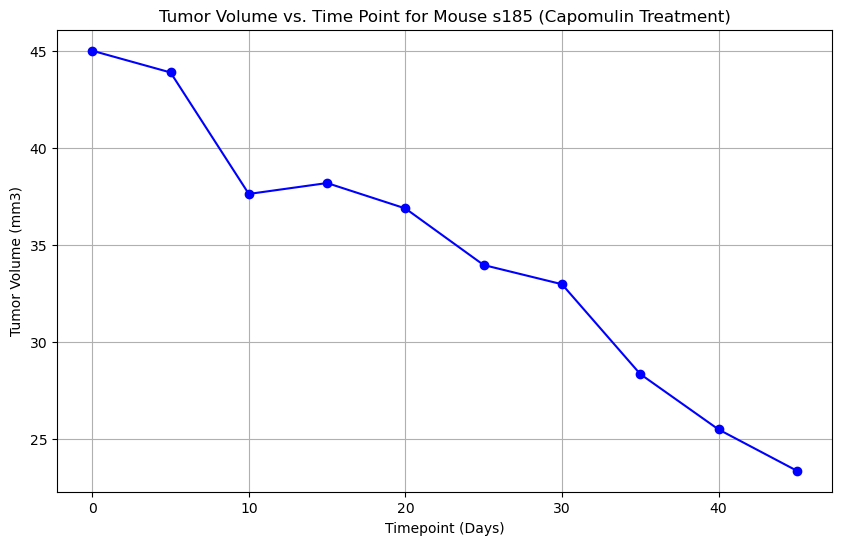

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse treated with Capomulin
capomulin_mouse = merged_data[merged_data['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()[0]

# Filter the data for the selected mouse treated with Capomulin
capomulin_mouse_data = merged_data[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == capomulin_mouse)]

#Generate a line plot of tumor volume vs. time point for the selected mouse:

import matplotlib.pyplot as plt

# Create a line plot of tumor volume vs. time point for the selected mouse treated with Capomulin
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title(f"Tumor Volume vs. Time Point for Mouse {capomulin_mouse} (Capomulin Treatment)")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()
               

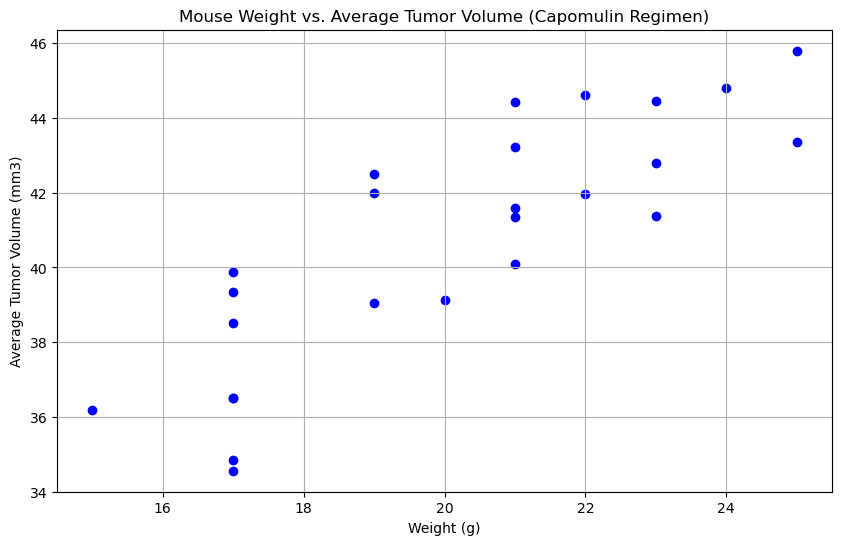

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Calculate the average tumor volume and mouse weight for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
average_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()


import matplotlib.pyplot as plt

# Create a scatter plot of mouse weight vs. average observed tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='b', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694722
Linear Regression Model:
Slope: 0.9544396890241049
Intercept: 21.552160532685008


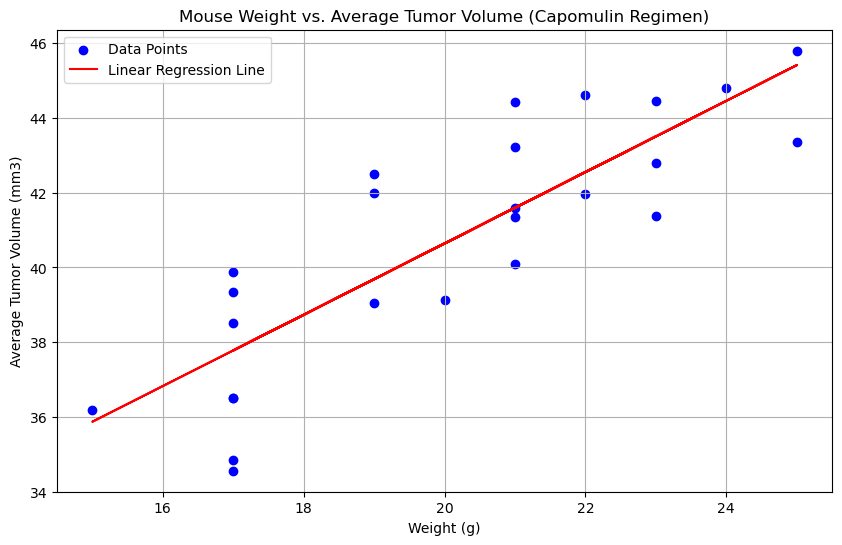

In [24]:
# Calculate the correlation coefficient between mouse weight and average observed tumor volume for the Capomulin regimen
correlation_coefficient = average_data['Weight (g)'].corr(average_data['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)


from scipy.stats import linregress

# Perform a linear regression for mouse weight and average observed tumor volume
slope, intercept, r_value, p_value, std_err = linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Print the slope and intercept of the linear regression model
print("Linear Regression Model:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of mouse weight vs. average observed tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='b', marker='o', label='Data Points')

# Add the linear regression line to the plot
plt.plot(average_data['Weight (g)'], slope * average_data['Weight (g)'] + intercept, color='r', label='Linear Regression Line')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.show()